# Neural Networks and Deep Learning
### CA1 - Question 1
### Written by Babak Hosseini Mohtasham 810101408 1403/12

**Table of contents**<a id='toc0_'></a>    
- [EDA](#toc2_)    
- [Preprocessing](#toc3_)    
- [Single layer MLP](#toc4_)    
- [Evaluation](#toc5_)    
- [Two layer MLP](#toc6_)    
- [Search hyperparameters](#toc7_)    
- [Logistic regression model](#toc8_)    
- [Standardization instead of nromalization](#toc9_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [49]:
import pandas as pd
import numpy as np
np.random.seed(42)

In [ ]:
!pip install kaggle

In [ ]:
! kaggle datasets download mlg-ulb/creditcardfraud
! unzip creditcardfraud.zip

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# <a id='toc2_'></a>[EDA](#toc0_)

In [52]:
df = pd.read_csv('creditcard.csv')
df[['V1','Time','Amount','Class']].sample(2)

,V1,Time,Amount,Class
43428,-16.526507,41505.0,364.19,1
49906,0.339812,44261.0,520.12,0


In [53]:
df[['V1', 'Time','Amount','Class']].describe()

,V1,Time,Amount,Class
count,2.848070e+05,284807.000000,284807.000000,284807.000000
mean,1.168375e-15,94813.859575,88.349619,0.001727
std,1.958696e+00,47488.145955,250.120109,0.041527
min,-5.640751e+01,0.000000,0.000000,0.000000
25%,-9.203734e-01,54201.500000,5.600000,0.000000
50%,1.810880e-02,84692.000000,22.000000,0.000000
75%,1.315642e+00,139320.500000,77.165000,0.000000
max,2.454930e+00,172792.000000,25691.160000,1.000000


In [54]:
df[['V1', 'Time','Amount','Class']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   Time    284807 non-null  float64
 2   Amount  284807 non-null  float64
 3   Class   284807 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 8.7 MB


In [55]:
df[['Class']].value_counts()

,count
Class,
0,284315
1,492


In [56]:
df[df['Amount'] == 0]['Class'].value_counts()

,count
Class,
0,1798
1,27


<Axes: xlabel='Class', ylabel='Count'>

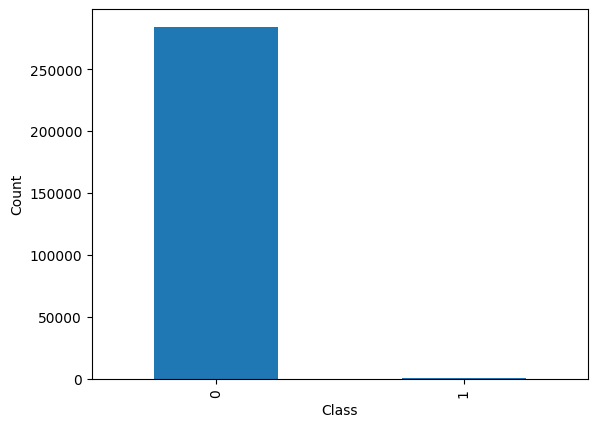

In [ ]:
df['Class'].value_counts().plot(kind='bar',ylabel='Count')

# <a id='toc3_'></a>[Preprocessing](#toc0_)

In [58]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [59]:
X = df.drop('Class', axis=1)
Y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=df['Class'])

In [ ]:
standardizer = StandardScaler()
X_train_standardized = standardizer.fit_transform(X_train)
X_test_standardized = standardizer.transform(X_test)
normalizer = MinMaxScaler()
X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)

# <a id='toc4_'></a>[Single layer MLP](#toc0_)

In [61]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
import matplotlib.pyplot as plt
tf.random.set_seed(42)

In [62]:
model = tf.keras.Sequential([
    Input(shape = (X.shape[1],)),
    Dense(units=64, activation='relu'),
    Dense(units=1, activation='sigmoid')
])
model_dropout = Sequential([
    Input(shape = (X.shape[1],)),
    Dense(units=64, activation='relu'),
    Dropout(0.3),
    Dense(units=1, activation='sigmoid')
])
model_regularization = Sequential([
    Input(shape = (X.shape[1],)),
    Dense(units=64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001)),
    Dense(units=1, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(0.0001))
])
model_dropout_regularization = Sequential([
    Input(shape = (X.shape[1],)),
    Dense(units=64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001)),
    Dropout(0.3),
    Dense(units=1, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(0.0001))
])

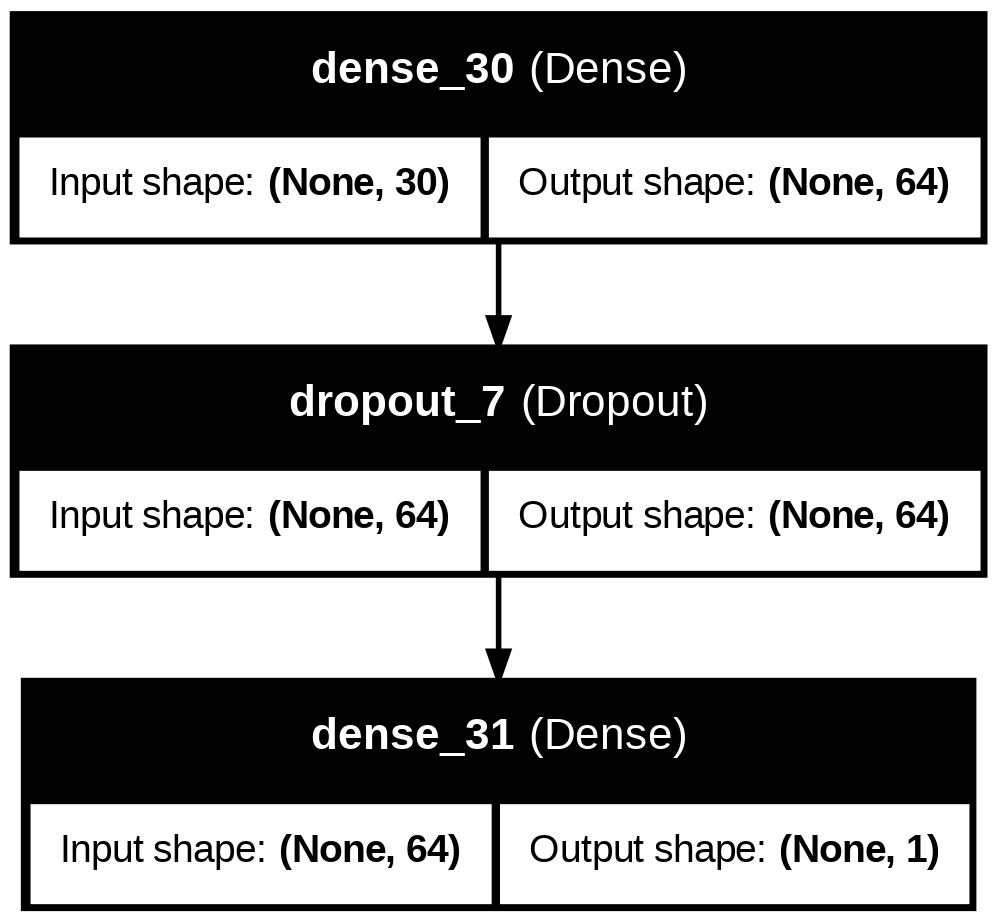

In [63]:
keras.utils.plot_model(model_dropout_regularization, show_shapes=True, show_layer_names=True)

In [64]:
model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])
history1 = model.fit(X_train_normalized, y_train, epochs=40, batch_size=32, validation_data=(X_test_normalized, y_test), verbose=2)

Epoch 1/40
6231/6231 - 33s - 5ms/step - accuracy: 0.9978 - loss: 0.0112 - val_accuracy: 0.9987 - val_loss: 0.0061
Epoch 2/40
6231/6231 - 15s - 2ms/step - accuracy: 0.9990 - loss: 0.0046 - val_accuracy: 0.9991 - val_loss: 0.0045
Epoch 3/40
6231/6231 - 14s - 2ms/step - accuracy: 0.9993 - loss: 0.0039 - val_accuracy: 0.9991 - val_loss: 0.0043
Epoch 4/40
6231/6231 - 20s - 3ms/step - accuracy: 0.9993 - loss: 0.0036 - val_accuracy: 0.9991 - val_loss: 0.0041
Epoch 5/40
6231/6231 - 15s - 2ms/step - accuracy: 0.9993 - loss: 0.0035 - val_accuracy: 0.9992 - val_loss: 0.0041
Epoch 6/40
6231/6231 - 14s - 2ms/step - accuracy: 0.9993 - loss: 0.0034 - val_accuracy: 0.9992 - val_loss: 0.0041
Epoch 7/40
6231/6231 - 20s - 3ms/step - accuracy: 0.9993 - loss: 0.0033 - val_accuracy: 0.9992 - val_loss: 0.0040
Epoch 8/40
6231/6231 - 15s - 2ms/step - accuracy: 0.9993 - loss: 0.0033 - val_accuracy: 0.9993 - val_loss: 0.0041
Epoch 9/40
6231/6231 - 19s - 3ms/step - accuracy: 0.9994 - loss: 0.0032 - val_accuracy: 

In [65]:
model_dropout.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])
history2 = model_dropout.fit(X_train_normalized, y_train, epochs=40, batch_size=32, validation_data=(X_test_normalized, y_test), verbose=2)

Epoch 1/40
6231/6231 - 16s - 3ms/step - accuracy: 0.9978 - loss: 0.0119 - val_accuracy: 0.9987 - val_loss: 0.0057
Epoch 2/40
6231/6231 - 14s - 2ms/step - accuracy: 0.9990 - loss: 0.0053 - val_accuracy: 0.9990 - val_loss: 0.0050
Epoch 3/40
6231/6231 - 14s - 2ms/step - accuracy: 0.9991 - loss: 0.0044 - val_accuracy: 0.9991 - val_loss: 0.0046
Epoch 4/40
6231/6231 - 14s - 2ms/step - accuracy: 0.9992 - loss: 0.0042 - val_accuracy: 0.9991 - val_loss: 0.0044
Epoch 5/40
6231/6231 - 16s - 2ms/step - accuracy: 0.9992 - loss: 0.0039 - val_accuracy: 0.9991 - val_loss: 0.0043
Epoch 6/40
6231/6231 - 20s - 3ms/step - accuracy: 0.9992 - loss: 0.0037 - val_accuracy: 0.9990 - val_loss: 0.0045
Epoch 7/40
6231/6231 - 14s - 2ms/step - accuracy: 0.9993 - loss: 0.0036 - val_accuracy: 0.9992 - val_loss: 0.0042
Epoch 8/40
6231/6231 - 20s - 3ms/step - accuracy: 0.9992 - loss: 0.0037 - val_accuracy: 0.9991 - val_loss: 0.0042
Epoch 9/40
6231/6231 - 14s - 2ms/step - accuracy: 0.9993 - loss: 0.0037 - val_accuracy: 

In [66]:
model_regularization.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])
history3 = model_regularization.fit(X_train_normalized, y_train, epochs=40, batch_size=32, validation_data=(X_test_normalized, y_test), verbose=2)

Epoch 1/40
6231/6231 - 16s - 3ms/step - accuracy: 0.9984 - loss: 0.0125 - val_accuracy: 0.9987 - val_loss: 0.0091
Epoch 2/40
6231/6231 - 19s - 3ms/step - accuracy: 0.9988 - loss: 0.0081 - val_accuracy: 0.9989 - val_loss: 0.0087
Epoch 3/40
6231/6231 - 15s - 2ms/step - accuracy: 0.9989 - loss: 0.0078 - val_accuracy: 0.9989 - val_loss: 0.0085
Epoch 4/40
6231/6231 - 19s - 3ms/step - accuracy: 0.9989 - loss: 0.0077 - val_accuracy: 0.9989 - val_loss: 0.0085
Epoch 5/40
6231/6231 - 22s - 4ms/step - accuracy: 0.9989 - loss: 0.0077 - val_accuracy: 0.9989 - val_loss: 0.0084
Epoch 6/40
6231/6231 - 14s - 2ms/step - accuracy: 0.9989 - loss: 0.0077 - val_accuracy: 0.9989 - val_loss: 0.0084
Epoch 7/40
6231/6231 - 21s - 3ms/step - accuracy: 0.9989 - loss: 0.0076 - val_accuracy: 0.9989 - val_loss: 0.0083
Epoch 8/40
6231/6231 - 14s - 2ms/step - accuracy: 0.9989 - loss: 0.0076 - val_accuracy: 0.9990 - val_loss: 0.0083
Epoch 9/40
6231/6231 - 15s - 2ms/step - accuracy: 0.9989 - loss: 0.0076 - val_accuracy: 

In [67]:
model_dropout_regularization.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])
history4 = model_dropout_regularization.fit(X_train_normalized, y_train, epochs=40, batch_size=32, validation_data=(X_test_normalized, y_test), verbose=2)

Epoch 1/40
6231/6231 - 16s - 3ms/step - accuracy: 0.9975 - loss: 0.0151 - val_accuracy: 0.9984 - val_loss: 0.0093
Epoch 2/40
6231/6231 - 14s - 2ms/step - accuracy: 0.9987 - loss: 0.0090 - val_accuracy: 0.9987 - val_loss: 0.0082
Epoch 3/40
6231/6231 - 15s - 2ms/step - accuracy: 0.9988 - loss: 0.0085 - val_accuracy: 0.9988 - val_loss: 0.0083
Epoch 4/40
6231/6231 - 21s - 3ms/step - accuracy: 0.9989 - loss: 0.0083 - val_accuracy: 0.9988 - val_loss: 0.0079
Epoch 5/40
6231/6231 - 19s - 3ms/step - accuracy: 0.9989 - loss: 0.0082 - val_accuracy: 0.9988 - val_loss: 0.0080
Epoch 6/40
6231/6231 - 21s - 3ms/step - accuracy: 0.9988 - loss: 0.0081 - val_accuracy: 0.9988 - val_loss: 0.0080
Epoch 7/40
6231/6231 - 15s - 2ms/step - accuracy: 0.9988 - loss: 0.0081 - val_accuracy: 0.9988 - val_loss: 0.0079
Epoch 8/40
6231/6231 - 16s - 3ms/step - accuracy: 0.9989 - loss: 0.0082 - val_accuracy: 0.9988 - val_loss: 0.0080
Epoch 9/40
6231/6231 - 16s - 3ms/step - accuracy: 0.9989 - loss: 0.0081 - val_accuracy: 

In [68]:
def plot_history(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

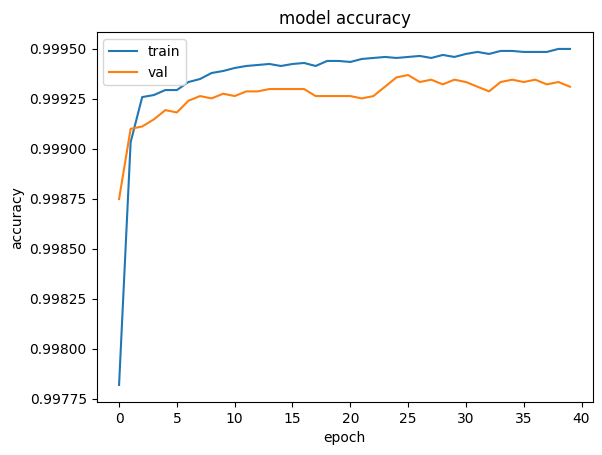

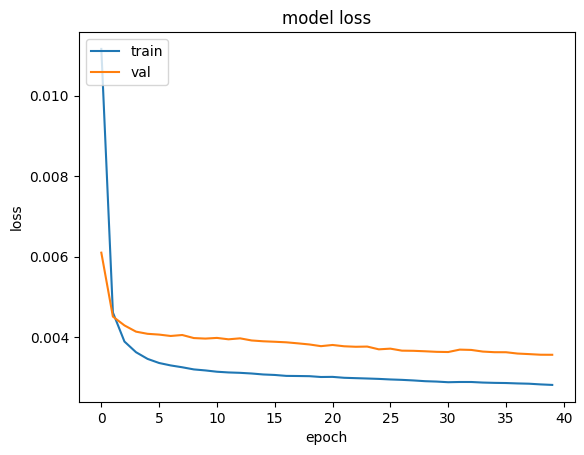

In [69]:
plot_history(history1)

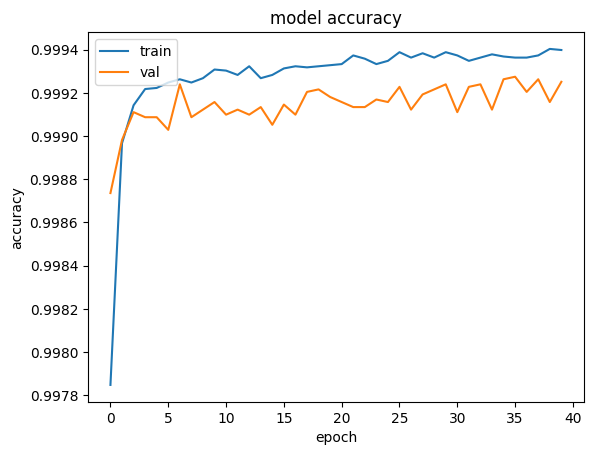

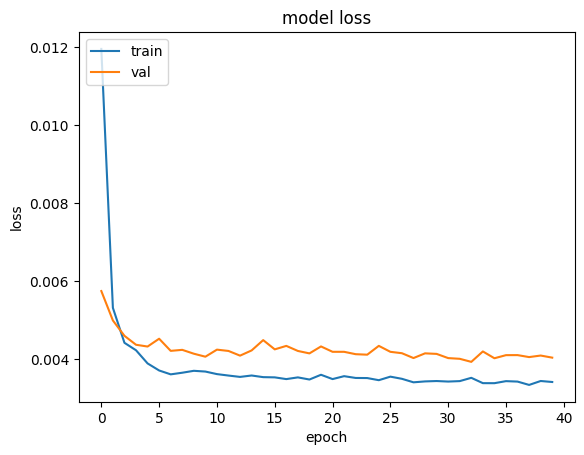

In [70]:
plot_history(history2)

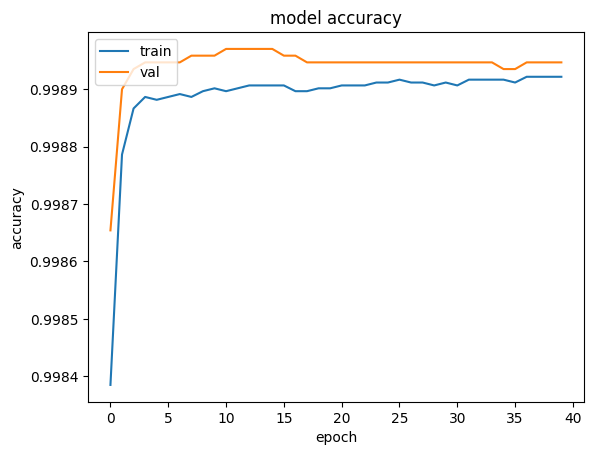

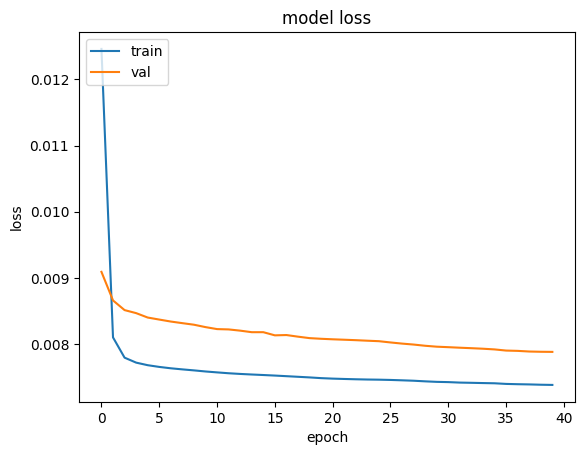

In [71]:
plot_history(history3)

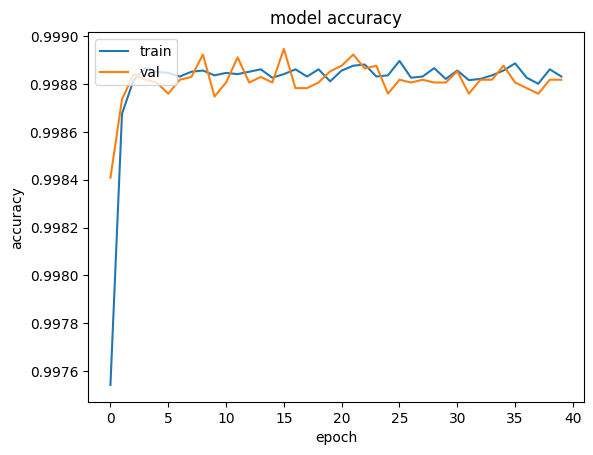

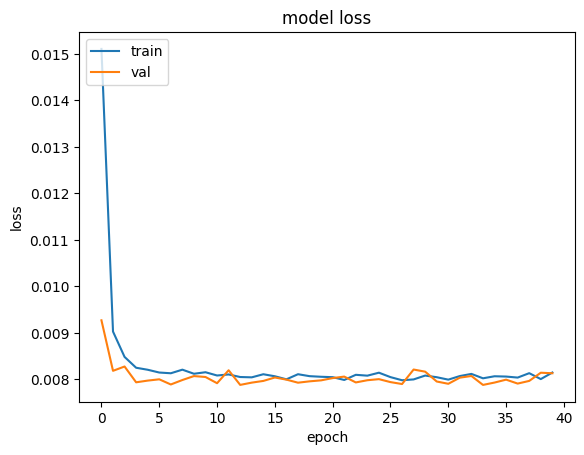

In [ ]:
plot_history(history4)

# <a id='toc5_'></a>[Evaluation](#toc0_)

In [73]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_curve,auc
import seaborn as sns

In [74]:
def evaluate(predicted_proba, actual_values):
    predictions = np.where(predicted_proba > 0.5, 1, 0)
    print(f"Accuracy: {round(accuracy_score(actual_values,predictions),3)}")
    print(f"Precision: {round(precision_score(actual_values,predictions),3)}")
    print(f"Recall: {round(recall_score(actual_values,predictions),3)}")
    print(f"F1 score: {round(f1_score(actual_values,predictions),3)}")
    matrix=confusion_matrix(actual_values,predictions)
    sns.heatmap(matrix, annot=True, cmap="flare")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.show()
    fpr, tpr, thresholds = roc_curve(y_test, predicted_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Accuracy: 0.999
Precision: 0.894
Recall: 0.682
F1 score: 0.774


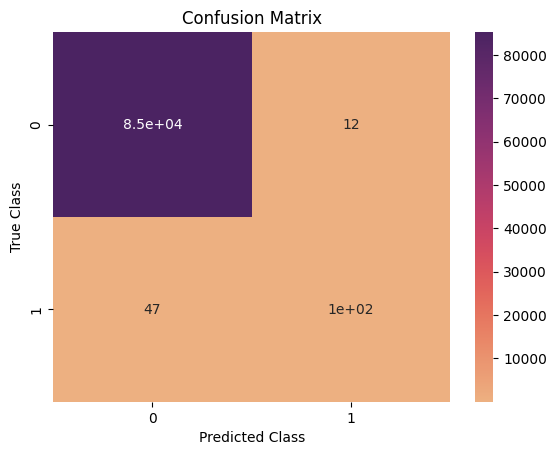

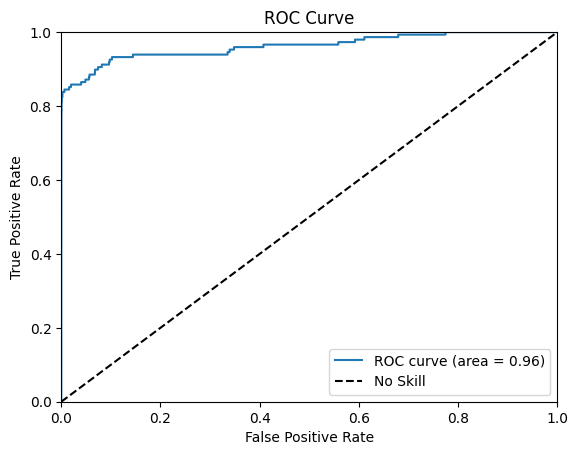

In [75]:
evaluate(model.predict(X_test_normalized),y_test)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 999us/step
Accuracy: 0.999
Precision: 0.856
Recall: 0.682
F1 score: 0.759


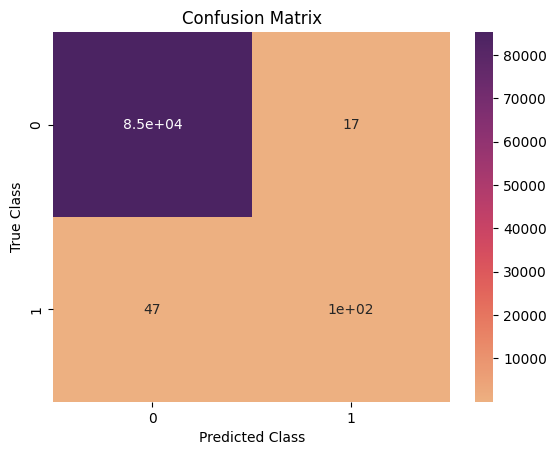

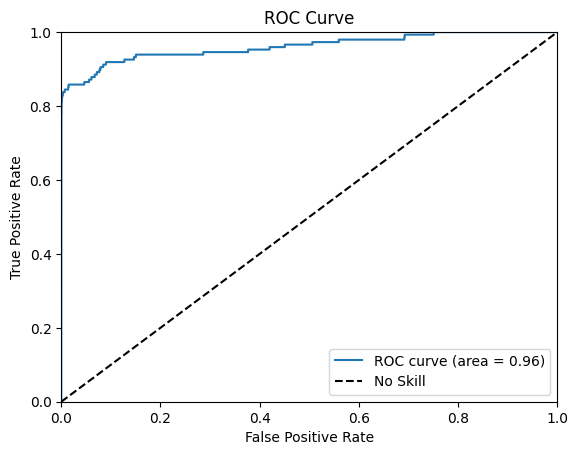

In [76]:
evaluate(model_dropout.predict(X_test_normalized),y_test)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 993us/step
Accuracy: 0.999
Precision: 0.83
Recall: 0.493
F1 score: 0.619


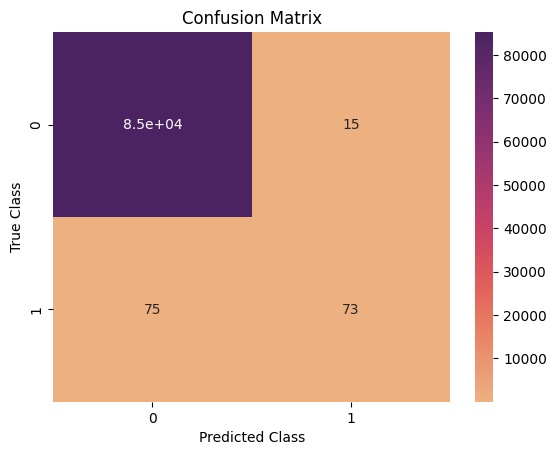

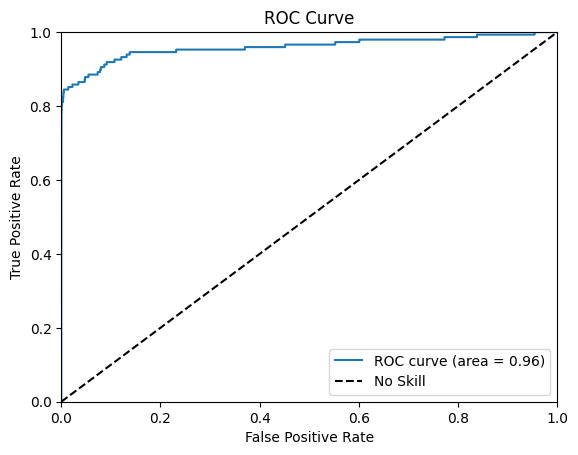

In [77]:
evaluate(model_regularization.predict(X_test_normalized),y_test)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Accuracy: 0.999
Precision: 0.805
Recall: 0.419
F1 score: 0.551


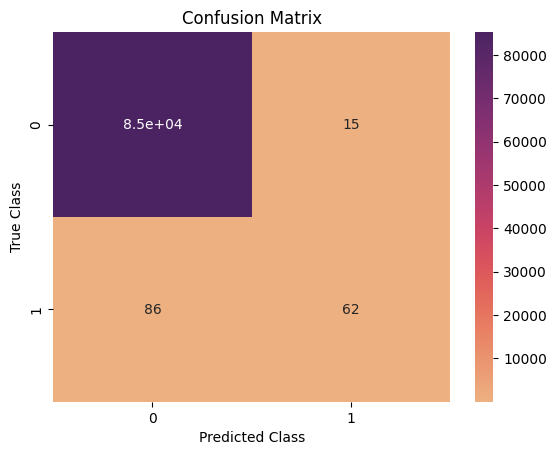

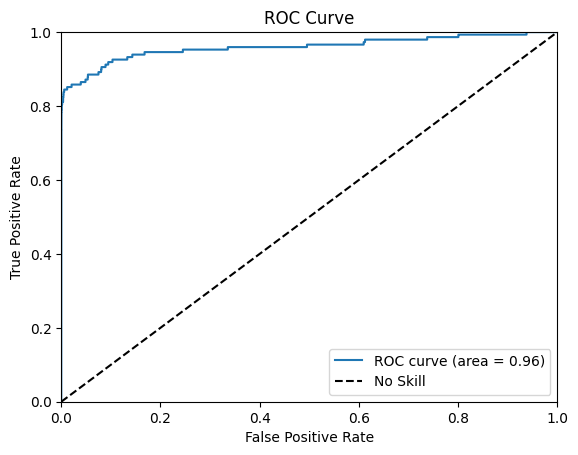

In [ ]:
evaluate(model_dropout_regularization.predict(X_test_normalized),y_test)

# <a id='toc6_'></a>[Two layer MLP](#toc0_)

In [79]:
model2 = tf.keras.Sequential([
    Input(shape = (X.shape[1],)),
    Dense(units=128, activation='relu',  kernel_regularizer=keras.regularizers.l2(0.0001)),
    Dropout(0.2),
    Dense(units=64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.0001)),
    Dropout(0.2),
    Dense(units=1, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(0.0001))
])

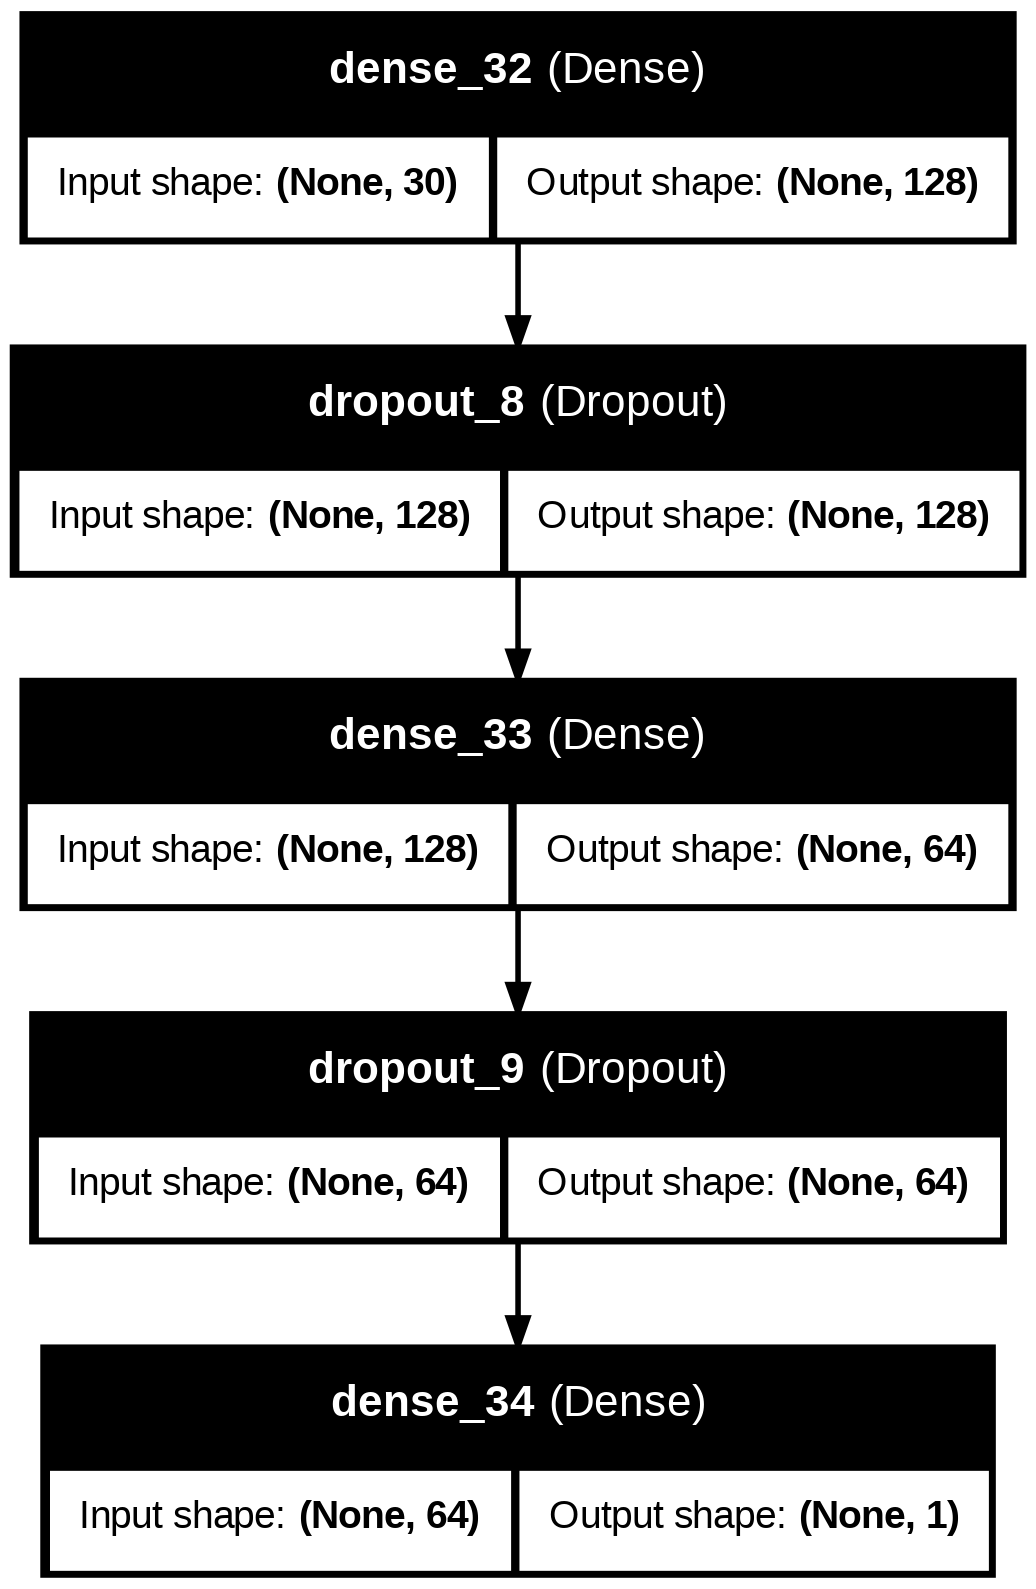

In [80]:
keras.utils.plot_model(model2, show_shapes=True, show_layer_names=True)

In [81]:
model2.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])
history5 = model2.fit(X_train_normalized, y_train, epochs=40, batch_size=32, validation_data=(X_test_normalized, y_test), verbose=2)

Epoch 1/40
6231/6231 - 17s - 3ms/step - accuracy: 0.9987 - loss: 0.0116 - val_accuracy: 0.9990 - val_loss: 0.0073
Epoch 2/40
6231/6231 - 20s - 3ms/step - accuracy: 0.9991 - loss: 0.0077 - val_accuracy: 0.9990 - val_loss: 0.0069
Epoch 3/40
6231/6231 - 17s - 3ms/step - accuracy: 0.9991 - loss: 0.0074 - val_accuracy: 0.9991 - val_loss: 0.0069
Epoch 4/40
6231/6231 - 17s - 3ms/step - accuracy: 0.9991 - loss: 0.0072 - val_accuracy: 0.9991 - val_loss: 0.0068
Epoch 5/40
6231/6231 - 17s - 3ms/step - accuracy: 0.9991 - loss: 0.0071 - val_accuracy: 0.9991 - val_loss: 0.0068
Epoch 6/40
6231/6231 - 16s - 3ms/step - accuracy: 0.9991 - loss: 0.0070 - val_accuracy: 0.9991 - val_loss: 0.0067
Epoch 7/40
6231/6231 - 23s - 4ms/step - accuracy: 0.9991 - loss: 0.0070 - val_accuracy: 0.9990 - val_loss: 0.0068
Epoch 8/40
6231/6231 - 16s - 3ms/step - accuracy: 0.9991 - loss: 0.0071 - val_accuracy: 0.9991 - val_loss: 0.0066
Epoch 9/40
6231/6231 - 22s - 4ms/step - accuracy: 0.9991 - loss: 0.0071 - val_accuracy: 

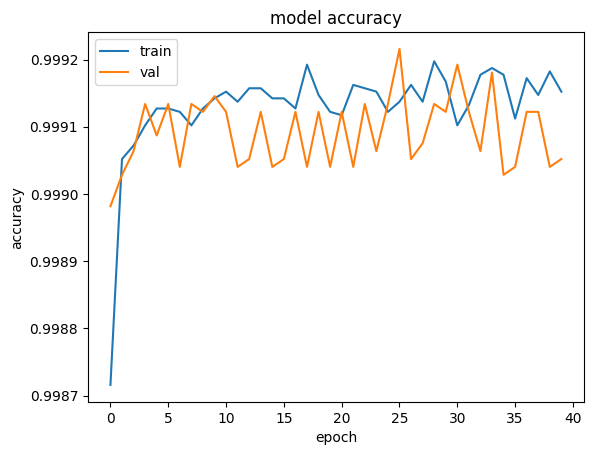

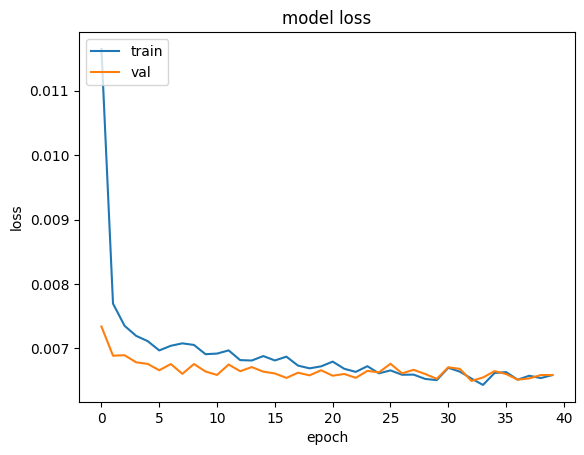

In [82]:
plot_history(history5)

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Accuracy: 0.999
Precision: 0.845
Recall: 0.554
F1 score: 0.669


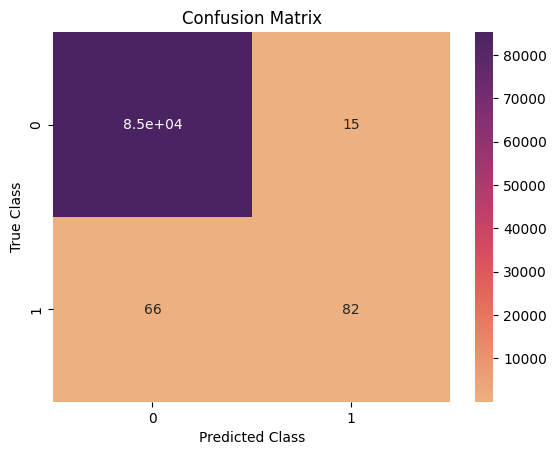

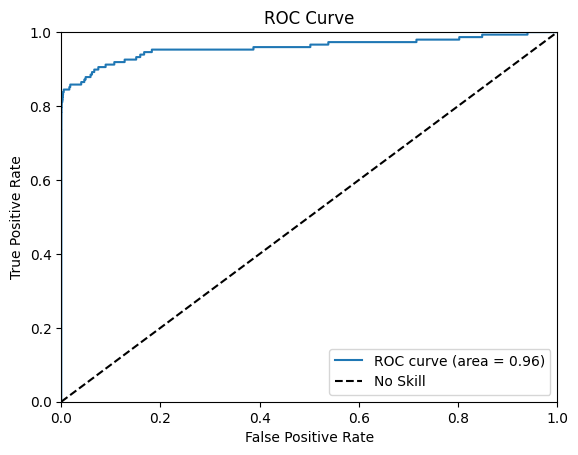

In [ ]:
evaluate(model2.predict(X_test_normalized),y_test)

# <a id='toc7_'></a>[Search hyperparameters](#toc0_)

In [84]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.7 MB/s eta 0:00:00


In [85]:
import optuna

In [86]:
def create_model(trial):
  model = Sequential()
  model.add(Input(shape = (X.shape[1],)))
  model.add(Dense(trial.suggest_categorical("units", [64,128,256]), activation='relu', kernel_regularizer=keras.regularizers.l2(trial.suggest_categorical("regularization", [0.001,0.0001]))))
  model.add(Dropout(trial.suggest_categorical("dropout_rate", [0.2,0.3,0.4])))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train_normalized,y_train,epochs=40,batch_size=trial.suggest_categorical("batch_size", [16,32,64]),validation_data=(X_test_normalized,y_test),verbose=2)
  return model.evaluate(X_test_normalized,y_test)[1]

In [87]:
sampler = optuna.samplers.RandomSampler()
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(create_model,n_trials=10)

[I 2025-03-06 05:59:27,937] A new study created in memory with name: no-name-6e3eac4a-f978-40f9-843b-10eead8cc7a5


Epoch 1/40
3116/3116 - 14s - 5ms/step - accuracy: 0.9982 - loss: 0.0189 - val_accuracy: 0.9983 - val_loss: 0.0114
Epoch 2/40
3116/3116 - 17s - 6ms/step - accuracy: 0.9983 - loss: 0.0113 - val_accuracy: 0.9983 - val_loss: 0.0107
Epoch 3/40
3116/3116 - 9s - 3ms/step - accuracy: 0.9983 - loss: 0.0102 - val_accuracy: 0.9984 - val_loss: 0.0100
Epoch 4/40
3116/3116 - 10s - 3ms/step - accuracy: 0.9985 - loss: 0.0096 - val_accuracy: 0.9984 - val_loss: 0.0094
Epoch 5/40
3116/3116 - 9s - 3ms/step - accuracy: 0.9986 - loss: 0.0092 - val_accuracy: 0.9985 - val_loss: 0.0091
Epoch 6/40
3116/3116 - 9s - 3ms/step - accuracy: 0.9986 - loss: 0.0087 - val_accuracy: 0.9985 - val_loss: 0.0083
Epoch 7/40
3116/3116 - 8s - 3ms/step - accuracy: 0.9986 - loss: 0.0087 - val_accuracy: 0.9987 - val_loss: 0.0083
Epoch 8/40
3116/3116 - 11s - 4ms/step - accuracy: 0.9987 - loss: 0.0083 - val_accuracy: 0.9987 - val_loss: 0.0078
Epoch 9/40
3116/3116 - 9s - 3ms/step - accuracy: 0.9988 - loss: 0.0081 - val_accuracy: 0.998

[I 2025-03-06 06:06:12,491] Trial 0 finished with value: 0.9986072778701782 and parameters: {'units': 256, 'regularization': 0.001, 'dropout_rate': 0.3, 'batch_size': 64}. Best is trial 0 with value: 0.9986072778701782.


Epoch 1/40
12461/12461 - 33s - 3ms/step - accuracy: 0.9983 - loss: 0.0110 - val_accuracy: 0.9987 - val_loss: 0.0072
Epoch 2/40
12461/12461 - 31s - 2ms/step - accuracy: 0.9988 - loss: 0.0074 - val_accuracy: 0.9988 - val_loss: 0.0065
Epoch 3/40
12461/12461 - 28s - 2ms/step - accuracy: 0.9989 - loss: 0.0069 - val_accuracy: 0.9990 - val_loss: 0.0060
Epoch 4/40
12461/12461 - 41s - 3ms/step - accuracy: 0.9990 - loss: 0.0068 - val_accuracy: 0.9990 - val_loss: 0.0058
Epoch 5/40
12461/12461 - 44s - 4ms/step - accuracy: 0.9990 - loss: 0.0064 - val_accuracy: 0.9990 - val_loss: 0.0058
Epoch 6/40
12461/12461 - 29s - 2ms/step - accuracy: 0.9990 - loss: 0.0066 - val_accuracy: 0.9990 - val_loss: 0.0059
Epoch 7/40
12461/12461 - 30s - 2ms/step - accuracy: 0.9990 - loss: 0.0063 - val_accuracy: 0.9989 - val_loss: 0.0056
Epoch 8/40
12461/12461 - 39s - 3ms/step - accuracy: 0.9989 - loss: 0.0065 - val_accuracy: 0.9988 - val_loss: 0.0057
Epoch 9/40
12461/12461 - 31s - 3ms/step - accuracy: 0.9989 - loss: 0.006

[I 2025-03-06 06:29:29,899] Trial 1 finished with value: 0.9990168809890747 and parameters: {'units': 128, 'regularization': 0.0001, 'dropout_rate': 0.4, 'batch_size': 16}. Best is trial 1 with value: 0.9990168809890747.


Epoch 1/40
3116/3116 - 9s - 3ms/step - accuracy: 0.9974 - loss: 0.0232 - val_accuracy: 0.9983 - val_loss: 0.0118
Epoch 2/40
3116/3116 - 11s - 3ms/step - accuracy: 0.9983 - loss: 0.0115 - val_accuracy: 0.9984 - val_loss: 0.0102
Epoch 3/40
3116/3116 - 19s - 6ms/step - accuracy: 0.9985 - loss: 0.0103 - val_accuracy: 0.9984 - val_loss: 0.0093
Epoch 4/40
3116/3116 - 8s - 3ms/step - accuracy: 0.9986 - loss: 0.0094 - val_accuracy: 0.9986 - val_loss: 0.0093
Epoch 5/40
3116/3116 - 10s - 3ms/step - accuracy: 0.9986 - loss: 0.0090 - val_accuracy: 0.9986 - val_loss: 0.0084
Epoch 6/40
3116/3116 - 10s - 3ms/step - accuracy: 0.9986 - loss: 0.0087 - val_accuracy: 0.9986 - val_loss: 0.0086
Epoch 7/40
3116/3116 - 9s - 3ms/step - accuracy: 0.9987 - loss: 0.0086 - val_accuracy: 0.9988 - val_loss: 0.0083
Epoch 8/40
3116/3116 - 8s - 3ms/step - accuracy: 0.9987 - loss: 0.0083 - val_accuracy: 0.9986 - val_loss: 0.0082
Epoch 9/40
3116/3116 - 8s - 3ms/step - accuracy: 0.9988 - loss: 0.0082 - val_accuracy: 0.998

[I 2025-03-06 06:35:57,204] Trial 2 finished with value: 0.9989349842071533 and parameters: {'units': 128, 'regularization': 0.001, 'dropout_rate': 0.3, 'batch_size': 64}. Best is trial 1 with value: 0.9990168809890747.


Epoch 1/40
12461/12461 - 33s - 3ms/step - accuracy: 0.9982 - loss: 0.0148 - val_accuracy: 0.9983 - val_loss: 0.0108
Epoch 2/40
12461/12461 - 29s - 2ms/step - accuracy: 0.9983 - loss: 0.0109 - val_accuracy: 0.9983 - val_loss: 0.0097
Epoch 3/40
12461/12461 - 32s - 3ms/step - accuracy: 0.9983 - loss: 0.0100 - val_accuracy: 0.9983 - val_loss: 0.0090
Epoch 4/40
12461/12461 - 39s - 3ms/step - accuracy: 0.9985 - loss: 0.0094 - val_accuracy: 0.9984 - val_loss: 0.0085
Epoch 5/40
12461/12461 - 42s - 3ms/step - accuracy: 0.9985 - loss: 0.0090 - val_accuracy: 0.9984 - val_loss: 0.0078
Epoch 6/40
12461/12461 - 32s - 3ms/step - accuracy: 0.9987 - loss: 0.0086 - val_accuracy: 0.9988 - val_loss: 0.0073
Epoch 7/40
12461/12461 - 38s - 3ms/step - accuracy: 0.9987 - loss: 0.0083 - val_accuracy: 0.9987 - val_loss: 0.0071
Epoch 8/40
12461/12461 - 41s - 3ms/step - accuracy: 0.9988 - loss: 0.0082 - val_accuracy: 0.9987 - val_loss: 0.0071
Epoch 9/40
12461/12461 - 32s - 3ms/step - accuracy: 0.9988 - loss: 0.007

[I 2025-03-06 06:58:55,744] Trial 3 finished with value: 0.9982678294181824 and parameters: {'units': 128, 'regularization': 0.001, 'dropout_rate': 0.2, 'batch_size': 16}. Best is trial 1 with value: 0.9990168809890747.


Epoch 1/40
6231/6231 - 18s - 3ms/step - accuracy: 0.9985 - loss: 0.0110 - val_accuracy: 0.9987 - val_loss: 0.0078
Epoch 2/40
6231/6231 - 16s - 3ms/step - accuracy: 0.9989 - loss: 0.0071 - val_accuracy: 0.9989 - val_loss: 0.0066
Epoch 3/40
6231/6231 - 18s - 3ms/step - accuracy: 0.9989 - loss: 0.0065 - val_accuracy: 0.9990 - val_loss: 0.0062
Epoch 4/40
6231/6231 - 19s - 3ms/step - accuracy: 0.9990 - loss: 0.0062 - val_accuracy: 0.9990 - val_loss: 0.0057
Epoch 5/40
6231/6231 - 15s - 2ms/step - accuracy: 0.9991 - loss: 0.0059 - val_accuracy: 0.9990 - val_loss: 0.0055
Epoch 6/40
6231/6231 - 21s - 3ms/step - accuracy: 0.9991 - loss: 0.0058 - val_accuracy: 0.9990 - val_loss: 0.0053
Epoch 7/40
6231/6231 - 16s - 3ms/step - accuracy: 0.9991 - loss: 0.0056 - val_accuracy: 0.9990 - val_loss: 0.0053
Epoch 8/40
6231/6231 - 15s - 2ms/step - accuracy: 0.9991 - loss: 0.0055 - val_accuracy: 0.9991 - val_loss: 0.0051
Epoch 9/40
6231/6231 - 15s - 2ms/step - accuracy: 0.9991 - loss: 0.0055 - val_accuracy: 

[I 2025-03-06 07:10:41,142] Trial 4 finished with value: 0.9989466667175293 and parameters: {'units': 256, 'regularization': 0.0001, 'dropout_rate': 0.3, 'batch_size': 32}. Best is trial 1 with value: 0.9990168809890747.


Epoch 1/40
3116/3116 - 9s - 3ms/step - accuracy: 0.9981 - loss: 0.0145 - val_accuracy: 0.9986 - val_loss: 0.0087
Epoch 2/40
3116/3116 - 10s - 3ms/step - accuracy: 0.9988 - loss: 0.0075 - val_accuracy: 0.9989 - val_loss: 0.0070
Epoch 3/40
3116/3116 - 8s - 3ms/step - accuracy: 0.9990 - loss: 0.0065 - val_accuracy: 0.9990 - val_loss: 0.0063
Epoch 4/40
3116/3116 - 10s - 3ms/step - accuracy: 0.9990 - loss: 0.0061 - val_accuracy: 0.9990 - val_loss: 0.0060
Epoch 5/40
3116/3116 - 10s - 3ms/step - accuracy: 0.9991 - loss: 0.0058 - val_accuracy: 0.9990 - val_loss: 0.0056
Epoch 6/40
3116/3116 - 10s - 3ms/step - accuracy: 0.9991 - loss: 0.0055 - val_accuracy: 0.9991 - val_loss: 0.0055
Epoch 7/40
3116/3116 - 8s - 3ms/step - accuracy: 0.9991 - loss: 0.0054 - val_accuracy: 0.9990 - val_loss: 0.0053
Epoch 8/40
3116/3116 - 8s - 3ms/step - accuracy: 0.9991 - loss: 0.0052 - val_accuracy: 0.9990 - val_loss: 0.0051
Epoch 9/40
3116/3116 - 8s - 3ms/step - accuracy: 0.9991 - loss: 0.0051 - val_accuracy: 0.999

[I 2025-03-06 07:17:02,487] Trial 5 finished with value: 0.9990519881248474 and parameters: {'units': 128, 'regularization': 0.0001, 'dropout_rate': 0.2, 'batch_size': 64}. Best is trial 5 with value: 0.9990519881248474.


Epoch 1/40
12461/12461 - 32s - 3ms/step - accuracy: 0.9982 - loss: 0.0147 - val_accuracy: 0.9983 - val_loss: 0.0113
Epoch 2/40
12461/12461 - 30s - 2ms/step - accuracy: 0.9983 - loss: 0.0119 - val_accuracy: 0.9983 - val_loss: 0.0108
Epoch 3/40
12461/12461 - 41s - 3ms/step - accuracy: 0.9983 - loss: 0.0115 - val_accuracy: 0.9983 - val_loss: 0.0098
Epoch 4/40
12461/12461 - 43s - 3ms/step - accuracy: 0.9983 - loss: 0.0111 - val_accuracy: 0.9983 - val_loss: 0.0093
Epoch 5/40
12461/12461 - 41s - 3ms/step - accuracy: 0.9983 - loss: 0.0110 - val_accuracy: 0.9983 - val_loss: 0.0090
Epoch 6/40
12461/12461 - 33s - 3ms/step - accuracy: 0.9983 - loss: 0.0106 - val_accuracy: 0.9983 - val_loss: 0.0088
Epoch 7/40
12461/12461 - 41s - 3ms/step - accuracy: 0.9983 - loss: 0.0105 - val_accuracy: 0.9983 - val_loss: 0.0082
Epoch 8/40
12461/12461 - 41s - 3ms/step - accuracy: 0.9983 - loss: 0.0106 - val_accuracy: 0.9983 - val_loss: 0.0082
Epoch 9/40
12461/12461 - 39s - 3ms/step - accuracy: 0.9984 - loss: 0.010

[I 2025-03-06 07:41:23,874] Trial 6 finished with value: 0.9987125992774963 and parameters: {'units': 256, 'regularization': 0.001, 'dropout_rate': 0.4, 'batch_size': 16}. Best is trial 5 with value: 0.9990519881248474.


Epoch 1/40
12461/12461 - 29s - 2ms/step - accuracy: 0.9986 - loss: 0.0101 - val_accuracy: 0.9987 - val_loss: 0.0071
Epoch 2/40
12461/12461 - 41s - 3ms/step - accuracy: 0.9989 - loss: 0.0070 - val_accuracy: 0.9989 - val_loss: 0.0063
Epoch 3/40
12461/12461 - 43s - 3ms/step - accuracy: 0.9990 - loss: 0.0065 - val_accuracy: 0.9990 - val_loss: 0.0059
Epoch 4/40
12461/12461 - 28s - 2ms/step - accuracy: 0.9991 - loss: 0.0062 - val_accuracy: 0.9989 - val_loss: 0.0057
Epoch 5/40
12461/12461 - 29s - 2ms/step - accuracy: 0.9990 - loss: 0.0061 - val_accuracy: 0.9990 - val_loss: 0.0055
Epoch 6/40
12461/12461 - 43s - 3ms/step - accuracy: 0.9991 - loss: 0.0060 - val_accuracy: 0.9989 - val_loss: 0.0057
Epoch 7/40
12461/12461 - 32s - 3ms/step - accuracy: 0.9991 - loss: 0.0059 - val_accuracy: 0.9990 - val_loss: 0.0053
Epoch 8/40
12461/12461 - 31s - 2ms/step - accuracy: 0.9991 - loss: 0.0059 - val_accuracy: 0.9989 - val_loss: 0.0054
Epoch 9/40
12461/12461 - 31s - 3ms/step - accuracy: 0.9991 - loss: 0.005

[I 2025-03-06 08:04:11,420] Trial 7 finished with value: 0.9989349842071533 and parameters: {'units': 128, 'regularization': 0.0001, 'dropout_rate': 0.3, 'batch_size': 16}. Best is trial 5 with value: 0.9990519881248474.


Epoch 1/40
6231/6231 - 18s - 3ms/step - accuracy: 0.9984 - loss: 0.0110 - val_accuracy: 0.9988 - val_loss: 0.0076
Epoch 2/40
6231/6231 - 20s - 3ms/step - accuracy: 0.9989 - loss: 0.0069 - val_accuracy: 0.9990 - val_loss: 0.0063
Epoch 3/40
6231/6231 - 21s - 3ms/step - accuracy: 0.9990 - loss: 0.0062 - val_accuracy: 0.9990 - val_loss: 0.0059
Epoch 4/40
6231/6231 - 16s - 3ms/step - accuracy: 0.9991 - loss: 0.0058 - val_accuracy: 0.9991 - val_loss: 0.0056
Epoch 5/40
6231/6231 - 21s - 3ms/step - accuracy: 0.9991 - loss: 0.0057 - val_accuracy: 0.9991 - val_loss: 0.0054
Epoch 6/40
6231/6231 - 16s - 3ms/step - accuracy: 0.9991 - loss: 0.0055 - val_accuracy: 0.9991 - val_loss: 0.0052
Epoch 7/40
6231/6231 - 16s - 3ms/step - accuracy: 0.9991 - loss: 0.0054 - val_accuracy: 0.9991 - val_loss: 0.0051
Epoch 8/40
6231/6231 - 20s - 3ms/step - accuracy: 0.9992 - loss: 0.0053 - val_accuracy: 0.9991 - val_loss: 0.0050
Epoch 9/40
6231/6231 - 16s - 3ms/step - accuracy: 0.9992 - loss: 0.0052 - val_accuracy: 

[I 2025-03-06 08:16:10,535] Trial 8 finished with value: 0.9991573095321655 and parameters: {'units': 256, 'regularization': 0.0001, 'dropout_rate': 0.2, 'batch_size': 32}. Best is trial 8 with value: 0.9991573095321655.


Epoch 1/40
3116/3116 - 9s - 3ms/step - accuracy: 0.9980 - loss: 0.0233 - val_accuracy: 0.9983 - val_loss: 0.0121
Epoch 2/40
3116/3116 - 9s - 3ms/step - accuracy: 0.9983 - loss: 0.0118 - val_accuracy: 0.9984 - val_loss: 0.0103
Epoch 3/40
3116/3116 - 8s - 3ms/step - accuracy: 0.9984 - loss: 0.0104 - val_accuracy: 0.9984 - val_loss: 0.0093
Epoch 4/40
3116/3116 - 10s - 3ms/step - accuracy: 0.9985 - loss: 0.0096 - val_accuracy: 0.9984 - val_loss: 0.0088
Epoch 5/40
3116/3116 - 8s - 2ms/step - accuracy: 0.9986 - loss: 0.0090 - val_accuracy: 0.9986 - val_loss: 0.0084
Epoch 6/40
3116/3116 - 9s - 3ms/step - accuracy: 0.9987 - loss: 0.0086 - val_accuracy: 0.9986 - val_loss: 0.0082
Epoch 7/40
3116/3116 - 8s - 3ms/step - accuracy: 0.9987 - loss: 0.0084 - val_accuracy: 0.9988 - val_loss: 0.0080
Epoch 8/40
3116/3116 - 8s - 3ms/step - accuracy: 0.9987 - loss: 0.0083 - val_accuracy: 0.9987 - val_loss: 0.0076
Epoch 9/40
3116/3116 - 8s - 3ms/step - accuracy: 0.9988 - loss: 0.0081 - val_accuracy: 0.9986 -

[I 2025-03-06 08:22:10,771] Trial 9 finished with value: 0.9987828135490417 and parameters: {'units': 64, 'regularization': 0.001, 'dropout_rate': 0.3, 'batch_size': 64}. Best is trial 8 with value: 0.9991573095321655.


In [88]:
study.best_params

{'units': 256, 'regularization': 0.0001, 'dropout_rate': 0.2, 'batch_size': 32}

In [ ]:
best_model =  Sequential()
best_model.add(Input(shape = (X.shape[1],)))
best_model.add(Dense(study.best_params["units"], activation='relu', kernel_regularizer=keras.regularizers.l2(study.best_params["regularization"])))
best_model.add(Dropout(study.best_params["dropout_rate"]))
best_model.add(Dense(1, activation='sigmoid'))

In [ ]:
best_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
best_model.fit(X_train_normalized,y_train,epochs=40,batch_size=study.best_params["batch_size"],validation_data=(X_test_normalized,y_test),verbose=2)

Epoch 1/40
6231/6231 - 31s - 5ms/step - accuracy: 0.9982 - loss: 0.0112 - val_accuracy: 0.9987 - val_loss: 0.0076
Epoch 2/40
6231/6231 - 26s - 4ms/step - accuracy: 0.9989 - loss: 0.0069 - val_accuracy: 0.9990 - val_loss: 0.0063
Epoch 3/40
6231/6231 - 15s - 2ms/step - accuracy: 0.9990 - loss: 0.0063 - val_accuracy: 0.9990 - val_loss: 0.0060
Epoch 4/40
6231/6231 - 23s - 4ms/step - accuracy: 0.9991 - loss: 0.0060 - val_accuracy: 0.9991 - val_loss: 0.0056
Epoch 5/40
6231/6231 - 16s - 3ms/step - accuracy: 0.9991 - loss: 0.0057 - val_accuracy: 0.9990 - val_loss: 0.0054
Epoch 6/40
6231/6231 - 19s - 3ms/step - accuracy: 0.9991 - loss: 0.0055 - val_accuracy: 0.9991 - val_loss: 0.0052
Epoch 7/40
6231/6231 - 15s - 2ms/step - accuracy: 0.9991 - loss: 0.0054 - val_accuracy: 0.9991 - val_loss: 0.0051
Epoch 8/40
6231/6231 - 23s - 4ms/step - accuracy: 0.9991 - loss: 0.0053 - val_accuracy: 0.9990 - val_loss: 0.0051
Epoch 9/40
6231/6231 - 19s - 3ms/step - accuracy: 0.9992 - loss: 0.0052 - val_accuracy: 

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Accuracy: 0.999
Precision: 0.843
Recall: 0.615
F1 score: 0.711


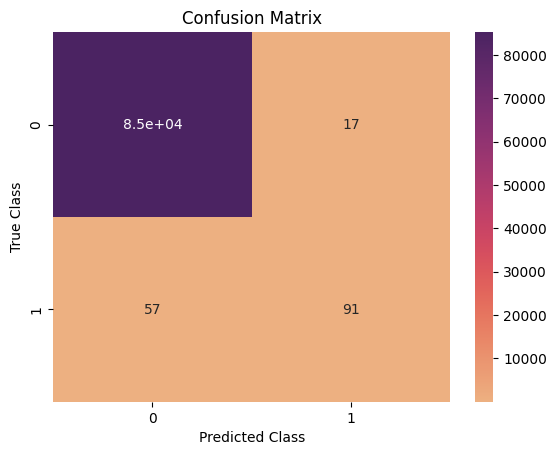

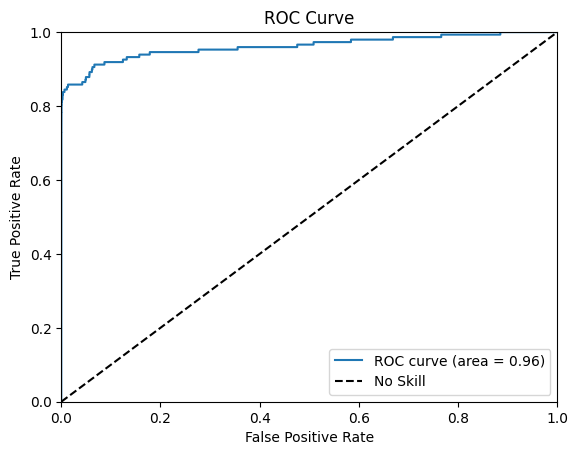

In [ ]:
evaluate(best_model.predict(X_test_normalized),y_test)

# <a id='toc8_'></a>[Logistic regression model](#toc0_)

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
model_lr = LogisticRegression()
model_lr.fit(X_train_normalized,y_train)

LogisticRegression()

Accuracy: 0.999
Precision: 0.83
Recall: 0.493
F1 score: 0.619


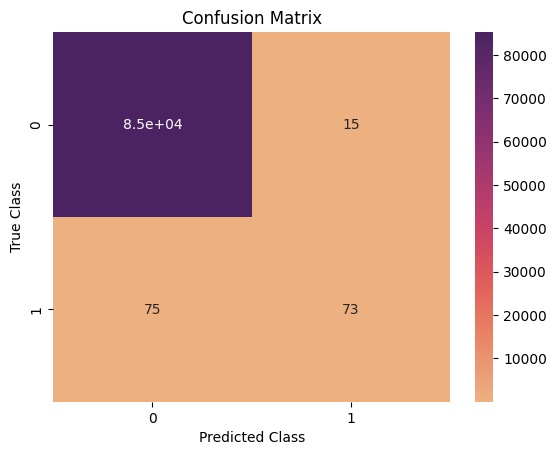

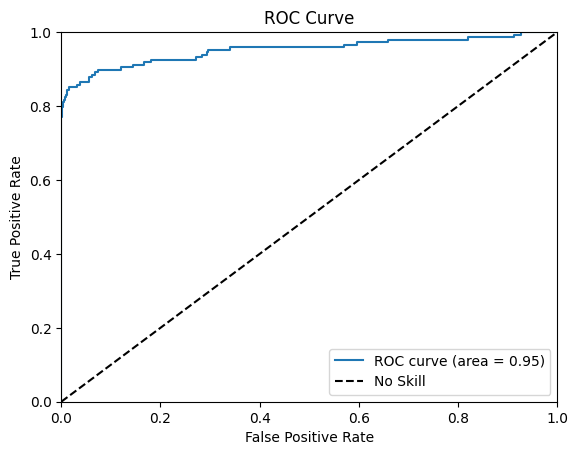

In [ ]:
evaluate(model_lr.predict_proba(X_test_normalized)[:,1],y_test)

# <a id='toc9_'></a>[Standardization instead of nromalization](#toc0_)

In [95]:
model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])
history1 = model.fit(X_train_standardized, y_train, epochs=40, batch_size=32, validation_data=(X_test_standardized, y_test), verbose=2)

Epoch 1/40
6231/6231 - 15s - 2ms/step - accuracy: 0.9899 - loss: 0.0884 - val_accuracy: 0.9992 - val_loss: 0.0124
Epoch 2/40
6231/6231 - 22s - 4ms/step - accuracy: 0.9993 - loss: 0.0067 - val_accuracy: 0.9992 - val_loss: 0.0102
Epoch 3/40
6231/6231 - 21s - 3ms/step - accuracy: 0.9994 - loss: 0.0056 - val_accuracy: 0.9992 - val_loss: 0.0084
Epoch 4/40
6231/6231 - 19s - 3ms/step - accuracy: 0.9994 - loss: 0.0044 - val_accuracy: 0.9991 - val_loss: 0.0081
Epoch 5/40
6231/6231 - 22s - 4ms/step - accuracy: 0.9994 - loss: 0.0039 - val_accuracy: 0.9992 - val_loss: 0.0074
Epoch 6/40
6231/6231 - 15s - 2ms/step - accuracy: 0.9994 - loss: 0.0037 - val_accuracy: 0.9992 - val_loss: 0.0069
Epoch 7/40
6231/6231 - 21s - 3ms/step - accuracy: 0.9995 - loss: 0.0032 - val_accuracy: 0.9991 - val_loss: 0.0072
Epoch 8/40
6231/6231 - 20s - 3ms/step - accuracy: 0.9995 - loss: 0.0029 - val_accuracy: 0.9992 - val_loss: 0.0065
Epoch 9/40
6231/6231 - 16s - 3ms/step - accuracy: 0.9995 - loss: 0.0027 - val_accuracy: 

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Accuracy: 0.999
Precision: 0.675
Recall: 0.743
F1 score: 0.707


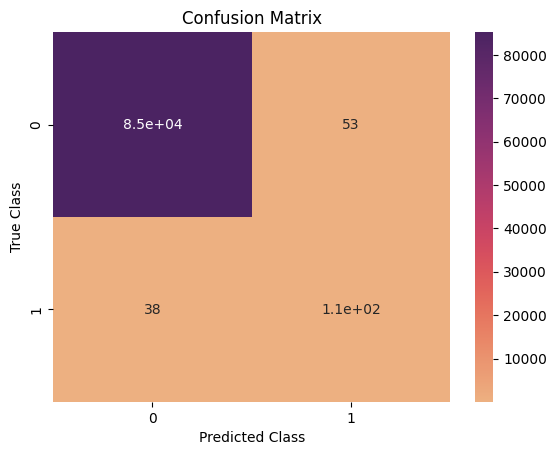

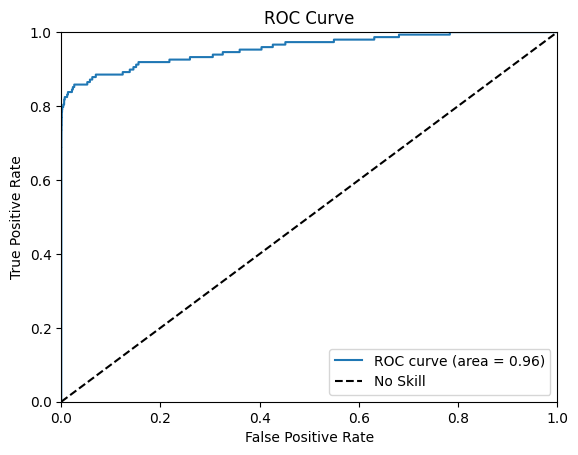

In [96]:
evaluate(model.predict(X_test_standardized),y_test)